In [1]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pandas as pd
import string

import matplotlib.pyplot as plt

In [2]:
import pprint
import csv
import ast
import re

from collections import Counter
from operator import itemgetter

import sqlite3 as sql
import time

from importlib import reload
from shutil import copyfile

In [3]:
#definition de la bdd
db = 'data/memoire.db'

In [4]:
#connexion à la bdd, crée la bdd si elle n'existe pas encore
cn=sql.connect(db)

In [5]:
#suppression de table dans la BDD
#cursor = cn.cursor()
#delete_table = """DROP TABLE nom_de_la_table"""
#cursor.execute(delete_table)

## Recherche dans la BDD

In [5]:
### Définir la ligne de la base de données à utiliser (inspécter préalablement la base de données)
#N_cant = 7923

# connnexion à la base de données
conn = sql.connect(db)
#Colonne="Descroption_de_l'objet"

### exécuter la requëte sur la base de donées SQLite pour récupérer les valeurs que contient la ligne
c = conn.cursor()
#c.execute('SELECT * FROM base')

c.execute('SELECT N°_cantonal, Typologie FROM Silex')
#c.execute('SELECT * FROM query WHERE pk_query = 10')

rc = c.fetchall()

# fermer la connexion
conn.close()

# imprimer et inspecter le résultat
rc[1]
len(rc)

878

In [6]:
df_silex = pd.DataFrame(rc, columns=['N°_Cantonal','Typologie'])
df_silex.head()

,N°_Cantonal,Typologie
0,7827,Nucleus
1,7834,Lamelle
2,7835,Nucleus
3,7840,Lamelle
4,7844,Lame


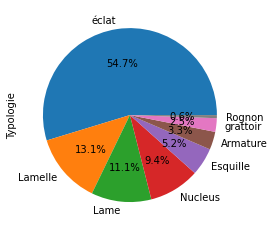

In [8]:
df_plot=df_silex["Typologie"].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')

In [13]:
fig=df_plot.get_figure()
fig.savefig('Typologie')

In [31]:
df_silex['Typo']=df_silex['Typologie']
df_silex[:10]

,N°_Cantonal,UF,Typologie,Typo
0,7827,A5,Nucleus,Nucleus
1,7834,A5,Lamelle,Lamelle
2,7835,A5,Nucleus,Nucleus
3,7840,A6,Lamelle,Lamelle
4,7844,A7,Lame,Lame
5,7846,A7,Lamelle,Lamelle
6,7850,A7,Nucleus,Nucleus
7,7851,A7,Lamelle,Lamelle
8,7854,A7,Esquille,Esquille
9,7855,A8,Nucleus,Nucleus


In [42]:
df_silex['Ty']=df_silex['Typologie']

In [51]:
### Regrouper par UF
place_count = df_silex.groupby(['UF', 'Typologie', 'Ty'], as_index=False) \
      .agg({'Typologie': ','.join, 'Typo': 'count'}).sort_values(by=['UF'])
print(len(place_count))
place_count[:10]

321


,UF,Ty,Typologie,Typo
0,A-B5,Esquille,Esquille,1
1,A-B5,Lamelle,Lamelle,1
2,A-B5,éclat,"éclat,éclat,éclat,éclat,éclat,éclat,éclat",7
3,A10,Esquille,"Esquille,Esquille",2
4,A10,Lame,Lame,1
5,A10,éclat,"éclat,éclat,éclat,éclat",4
10,A11,éclat,"éclat,éclat,éclat,éclat,éclat,éclat,éclat,écla...",20
8,A11,Lamelle,"Lamelle,Lamelle,Lamelle,Lamelle",4
9,A11,Nucleus,Nucleus,1
6,A11,Esquille,Esquille,1


In [53]:
df_carre=place_count.pivot(index='UF', columns='Ty', values='Typo')
df_carre[:10]

Ty,Armature,Esquille,Lame,Lamelle,Nucleus,Rognon,grattoir,éclat
UF,,,,,,,,
A-B5,NaN,1.0,NaN,1.0,NaN,NaN,NaN,7.0
A10,NaN,2.0,1.0,NaN,NaN,NaN,NaN,4.0
A11,NaN,1.0,2.0,4.0,1.0,NaN,NaN,20.0
A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
A4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
A5,NaN,NaN,NaN,1.0,2.0,NaN,NaN,4.0
A6,NaN,NaN,NaN,1.0,NaN,NaN,NaN,7.0
A7,NaN,1.0,1.0,2.0,1.0,NaN,NaN,6.0
A8,NaN,1.0,1.0,3.0,1.0,NaN,NaN,1.0


In [54]:
df_carre.to_excel(r'Typo_par_carre.xlsx', index = True)

In [224]:
g=list()
for i in range(len(rc)):
    if "poi" in rc[i][0]:
        g.append(rc[i])
    
len(g)

18

In [225]:
g

[('pointe retouchée à tronquature', 7910),
 ('pointe retouchée', 7934),
 ('pointe à tronquature', 7959),
 ('pointe à retouches denticulées sur 1 côté', 8105),
 ('pointe à tronquature cassée', 8171),
 ('pointe retouchée ?', 8179),
 ('pointe de flèche à ailette, bord denticulé', 8196),
 ('pointe corticale à tronquature', 8211),
 ('pointe  ', 8227),
 ('pointe à tronquature oblique', 8279),
 ('pointe à tronquature ou trapèze?', 8317),
 ('pointe à tronquature oblique', 8355),
 ('pointe à tronquature oblique', 8369),
 ('pointe corticale ?', 8428),
 ('pointe ', 8500),
 ('1 pointe de flèche néol.', 8511),
 ('pointe ', 10465),
 ('pointe', 1869)]

In [226]:
b=list()
for i in range(len(g)):
    a=list(g[i])
    a[0]='Armature'
    b.append(a)
b[4:8]

[['Armature', 8171],
 ['Armature', 8179],
 ['Armature', 8196],
 ['Armature', 8211]]

## Mise à jour des données dans la BDD

In [227]:
cn = sql.connect(db)
c = cn.cursor()

# Insérer les données
c.executemany("UPDATE Silex SET Typologie=? WHERE N°_cantonal=?", b)

# valider l'insertion et fermer la base de données
cn.commit()
cn.close()
